In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install git+https://github.com/demetriomagatti/bioinformatics_basics.git@main

  Cloning https://github.com/demetriomagatti/bioinformatics_basics.git (to revision main) to /tmp/pip-req-build-c_re8gou
  Running command git clone -q https://github.com/demetriomagatti/bioinformatics_basics.git /tmp/pip-req-build-c_re8gou
Note: you may need to restart the kernel to use updated packages.


### Example

In [4]:
from bioinformatics_basics import alignment
solver = alignment.ManhattanSolver(nrows=6,ncols=5,MaxScore=10)

Initialized module


In [5]:
# matrix containing scores for "to nord" movements
solver.MoveNord

array([[2., 5., 6., 3., 4.],
       [2., 5., 1., 8., 7.],
       [7., 0., 0., 3., 1.],
       [8., 7., 3., 4., 7.],
       [7., 7., 8., 3., 6.]])

In [6]:
# matrix containing scores for "to east" movements
solver.MoveEast

array([[9., 6., 8., 5.],
       [6., 4., 8., 1.],
       [1., 1., 8., 0.],
       [4., 3., 1., 1.],
       [2., 8., 0., 0.],
       [2., 2., 2., 7.]])

In [7]:
# matrix containing maximum score to a vertex - empty before running
solver.Score

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
# moves to maximize score to a vertex - empty before running
solver.Moves

{}

In [9]:
solver.run()

In [10]:
# matrix containing maximum score to a vertex
solver.Score

array([[ 0.,  9., 15., 23., 28.],
       [ 2., 14., 21., 29., 32.],
       [ 4., 19., 22., 37., 39.],
       [11., 19., 22., 40., 41.],
       [19., 26., 34., 44., 48.],
       [26., 33., 42., 47., 54.]])

In [11]:
# moves to maximize score to the final vertex
solver.Moves[list(solver.Moves.keys())[-1]]

['East', 'East', 'Nord', 'East', 'Nord', 'Nord', 'Nord', 'Nord', 'East']

IndexError: list index out of range

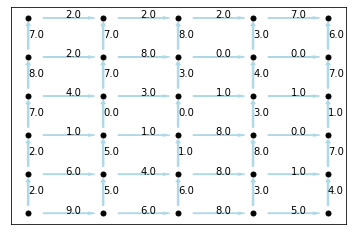

In [12]:
# visual check
solver.visualize()

In [ ]:
for key in solver.Moves.keys():
    path = [[0,0]]
    for i in range(len(solver.Moves[key])):
        path.append([solver.Moves[key][:i+1].count('East'),solver.Moves[key][:i+1].count('Nord')])

In [ ]:
path

In [ ]:
plt.plot(np.transpose(path)[0],np.transpose(path)[1],'.')